In [80]:
# Paths
DATA_PATH = r"..\data\processed\processed_1.pkl"

In [81]:
TECH_COLS = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 
             'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 
             'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith']

TECH_NEXT_COLS = ['LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 
                  'PlatformWantToWorkWith', 'WebframeWantToWorkWith', 
                  'MiscTechWantToWorkWith', 'ToolsTechWantToWorkWith']

ROLE_COLS = ['DevType']

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
import plotly.graph_objects as go


In [83]:
processed_df = pd.read_pickle(DATA_PATH)

In [84]:
df = processed_df.copy()

In [85]:
# One hot encoding
encoded_dfs = {}
for col in TECH_COLS :
    mlb = MultiLabelBinarizer()
    one_hot_encoded = pd.DataFrame(mlb.fit_transform(df[col]), columns=mlb.classes_, index=df.index)
    encoded_dfs[col] = one_hot_encoded
df = pd.concat( encoded_dfs, axis=1)


In [86]:
role_col = processed_df['DevType']
one_hot_single_col = pd.get_dummies(role_col)


In [87]:
multi_level_columns = pd.MultiIndex.from_product([['DevType'], one_hot_single_col.columns])


In [88]:
one_hot_single_col.columns = multi_level_columns


In [89]:
df = pd.concat([df, one_hot_single_col], axis=1)


In [90]:
skill_freq = df.drop('DevType', axis=1).sum().reset_index()       
skill_freq.columns = ['Group', 'Skill', 'Freq']
skill_freq.head()

C:\Users\Mohamed Gad\AppData\Local\Temp\ipykernel_13296\1766006599.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



,Group,Skill,Freq
0,LanguageHaveWorkedWith,,2044
1,LanguageHaveWorkedWith,APL,225
2,LanguageHaveWorkedWith,Ada,677
3,LanguageHaveWorkedWith,Apex,579
4,LanguageHaveWorkedWith,Assembly,4753


In [91]:
fig=px.treemap(skill_freq, path=['Group', 'Skill'], values='Freq', title='Skill Frequency',
                color_continuous_scale='YlOrRd', color='Freq')
fig.update_layout (width =900, height=900)
fig.show()

In [92]:
df_dropped = df.droplevel(level=0, axis=1)

In [93]:
df.sum().reset_index()

,level_0,level_1,0
0,LanguageHaveWorkedWith,,2044
1,LanguageHaveWorkedWith,APL,225
2,LanguageHaveWorkedWith,Ada,677
3,LanguageHaveWorkedWith,Apex,579
4,LanguageHaveWorkedWith,Assembly,4753
...,...,...,...
266,DevType,Scientist,351
267,DevType,Security professional,474
268,DevType,"Senior Executive (C-Suite, VP, etc.)",1332
269,DevType,Student,1996


In [101]:
skill_freq

,Group,Skill,Freq
0,LanguageHaveWorkedWith,,2044
1,LanguageHaveWorkedWith,APL,225
2,LanguageHaveWorkedWith,Ada,677
3,LanguageHaveWorkedWith,Apex,579
4,LanguageHaveWorkedWith,Assembly,4753
...,...,...,...
232,ToolsTechHaveWorkedWith,liblittletest,37
233,ToolsTechHaveWorkedWith,npm,39609
234,ToolsTechHaveWorkedWith,pnpm,5036
235,ToolsTechHaveWorkedWith,snitch,55


In [104]:
sorted_roles = df['DevType'].sum().sort_values().index.tolist()
sorted_skills = df.drop('DevType', axis=1).sum().sort_values(ascending=False).droplevel(0).index.tolist()

C:\Users\Mohamed Gad\AppData\Local\Temp\ipykernel_13296\497564883.py:2: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [105]:
sorted_skills

['JavaScript',
 'HTML/CSS',
 'Python',
 'SQL',
 'Docker',
 'npm',
 'PostgreSQL',
 'TypeScript',
 'Amazon Web Services (AWS)',
 '',
 'MySQL',
 'Node.js',
 'React',
 'Bash/Shell (all shells)',
 'Java',
 '',
 'C#',
 'SQLite',
 'Pip',
 '',
 'C++',
 'MongoDB',
 'Microsoft SQL Server',
 'Microsoft Azure',
 'Homebrew',
 'Yarn',
 '.NET (5+) ',
 'C',
 'Webpack',
 'Google Cloud',
 'PHP',
 'Make',
 'jQuery',
 '',
 'Redis',
 'Kubernetes',
 'Express',
 'NumPy',
 'MariaDB',
 'Pandas',
 'Angular',
 'NuGet',
 'Maven (build tool)',
 'Next.js',
 'Gradle',
 'PowerShell',
 'ASP.NET CORE',
 'Vite',
 'Vue.js',
 'Visual Studio Solution',
 'Go',
 'CMake',
 '.NET Framework (1.0 - 4.8)',
 'Rust',
 '',
 'Firebase',
 'Cloudflare',
 'Cargo',
 'Elasticsearch',
 'GNU GCC',
 'WordPress',
 'Digital Ocean',
 'ASP.NET',
 'Terraform',
 'Flask',
 'Spring Boot',
 'MSBuild',
 'Heroku',
 'Django',
 'Kotlin',
 'Oracle',
 'Spring Framework',
 'Vercel',
 'RabbitMQ',
 'Ansible',
 'Dynamodb',
 'Chocolatey',
 'TensorFlow',
 'Sciki

In [106]:
skills = []
for role in sorted_roles :
    role_mask = (df[('DevType', role)]==1)
    skills_role = pd.concat({tech_col : df.loc[role_mask, tech_col].mean()*100 for tech_col in TECH_COLS})
    skills.append(skills_role)
skills = pd.concat(skills, axis=1)

skills.columns = sorted_roles
skills = skills.reset_index(level=0, drop = True)
skills = skills.loc[sorted_skills]
skills = skills.T


<AxesSubplot:>

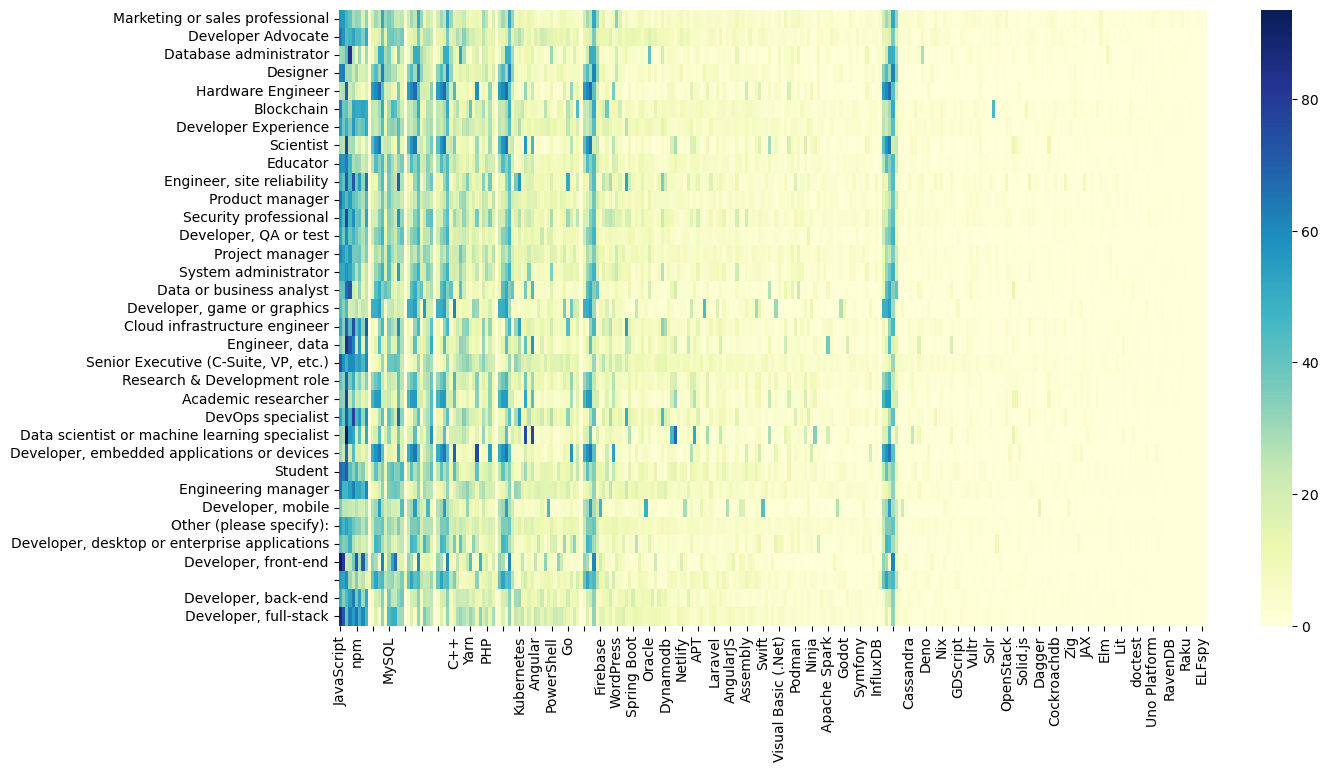

In [122]:
import seaborn as sns
plt.figure(figsize=(14, 8)) 
sns.heatmap(skills, cmap="YlGnBu", annot=False)


In [118]:
skills

,JavaScript,HTML/CSS,Python,SQL,Docker,npm,PostgreSQL,TypeScript,Amazon Web Services (AWS),,...,Flow,build2,TiDB,Raku,tunit,lest,snitch,CUTE,ELFspy,liblittletest
Marketing or sales professional,56.375839,55.704698,45.637584,40.939597,28.187919,32.214765,30.872483,16.778523,32.214765,4.697987,...,1.342282,2.013423,2.684564,0.671141,1.342282,0.671141,0.671141,1.342282,0.671141,0.671141
Developer Advocate,63.679245,56.603774,42.452830,46.698113,52.830189,43.867925,44.339623,34.433962,50.943396,0.943396,...,0.000000,0.000000,0.000000,0.000000,0.471698,0.471698,0.000000,0.000000,0.000000,0.000000
Database administrator,29.571984,31.517510,42.412451,82.879377,25.680934,11.284047,30.350195,6.614786,29.571984,3.112840,...,0.778210,0.389105,0.778210,0.389105,0.389105,0.000000,0.389105,0.000000,0.000000,0.000000
Designer,61.565836,62.989324,30.249110,29.893238,21.352313,30.604982,16.725979,18.149466,21.352313,3.558719,...,0.711744,0.355872,0.000000,0.711744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hardware Engineer,25.524476,27.622378,69.930070,22.027972,26.573427,15.734266,12.937063,6.993007,14.685315,2.447552,...,0.000000,0.000000,0.000000,1.048951,0.349650,0.000000,0.000000,0.349650,0.000000,0.349650
Blockchain,62.229102,38.390093,41.795666,30.340557,52.631579,50.464396,50.154799,52.321981,50.773994,1.547988,...,0.619195,0.928793,0.619195,0.309598,0.619195,0.619195,0.309598,0.309598,0.309598,0.309598
Developer Experience,55.214724,38.343558,49.693252,36.503067,55.521472,41.411043,36.503067,40.184049,51.226994,1.533742,...,0.920245,0.920245,0.613497,0.000000,0.306748,0.306748,0.306748,0.613497,0.306748,0.000000
Scientist,27.635328,25.071225,77.492877,27.920228,29.344729,12.250712,19.943020,7.122507,21.367521,1.994302,...,0.284900,0.284900,0.284900,0.284900,0.284900,0.284900,0.284900,0.000000,0.000000,0.284900
Educator,57.831325,56.144578,63.132530,45.783133,27.951807,31.325301,29.638554,20.000000,25.060241,2.168675,...,0.000000,0.000000,0.000000,0.240964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Engineer, site reliability",49.882904,40.046838,71.896956,44.496487,72.131148,38.875878,55.503513,31.850117,64.402810,0.702576,...,0.234192,0.000000,0.234192,0.234192,0.000000,0.234192,0.000000,0.000000,0.000000,0.000000


In [124]:
fig = go.Figure(
    data=go.Heatmap(
        z=skills,
        x=skills.columns,
        y=skills.index,
        colorscale='magma',
        ygap=1
    )
)

fig.update_layout(width=1400, height=700)

fig.show()